In [43]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import MESS
import numpy as np
import os
import pandas as pd

from IPython.display import display

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the tree data

In [46]:
dorrigo_df = pd.read_csv("Dorrigo.csv", header=0, index_col=0)
nightcap_df = pd.read_csv("Nightcap.csv", header=0, index_col=0)
washpool_df = pd.read_csv("Washpool.csv", header=0, index_col=0)
site_df = {"Dorrigo":dorrigo_df, "Nightcap":nightcap_df, "Washpool":washpool_df}
for site, df in site_df.items():
    print("{} richness {}".format(site, len(df)))
    display(df[:5])

## Get metacommunity trait distribution (pool all traits for all sites)
metacommunity_traits = pd.concat([dorrigo_df, nightcap_df, washpool_df], axis=0)
metacommunity_traits = metacommunity_traits["trait"].unique()

print("S_m: {}".format(len(metacommunity_traits)))

Nightcap richness 51


,pi,trait
Acacia melanoxylon,0.000010,0.045522
Acradenia euodiiformis,0.000084,0.933994
Acronychia pubescens,0.000754,-0.273173
Alangium villosum,0.000020,-0.939426
Archirhodomyrtus beckleri,0.000078,1.749622


Dorrigo richness 53


,pi,trait
Acacia melanoxylon,0.001527,0.045522
Acradenia euodiiformis,0.000678,0.933994
Acronychia oblongifolia,0.000034,0.601673
Acronychia pubescens,0.000469,-0.273173
Alangium villosum,0.000000,-0.939426


Washpool richness 53


,pi,trait
Acacia melanoxylon,0.000028,0.045522
Acronychia oblongifolia,0.000007,0.601673
Acronychia pubescens,0.000010,-0.273173
Alangium villosum,0.000000,-0.939426
Alphitonia excelsa,0.000000,0.133814


S_m: 70


# Select the best model

Predict() started: 2019-06-12 22:43:30.433410
Selecting features:
  community_assembly_model	['S', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_pi', 'std_pi', 'skewness_pi', 'kurtosis_pi', 'median_pi', 'iqr_pi', 'mean_local_traits', 'std_local_traits', 'skewness_local_traits', 'kurtosis_local_traits', 'median_local_traits', 'iqr_local_traits', 'mean_regional_traits', 'std_regional_traits', 'skewness_regional_traits', 'kurtosis_regional_traits', 'median_regional_traits', 'iqr_regional_traits', 'reg_loc_mean_trait_dif', 'reg_loc_std_trait_dif', 'reg_loc_skewness_trait_dif', 'reg_loc_kurtosis_trait_dif', 'reg_loc_median_trait_dif', 'reg_loc_iqr_trait_dif', 'pi_trait_cor', 'SGD_0', 'SGD_1', 'SGD_2', 'SGD_3', 'SGD_4']
All selected features: S pi_h1 pi_h2 pi_h3 pi_h4 mean_pi std_pi skewness_pi kurtosis_pi median_pi iqr_pi mean_local_traits std_local_traits skewness_local_traits kurtosis_local_traits median_local_traits iqr_local_traits mean_regional_traits std_regional_traits skewness_regional_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 20.0min finished


{'n_estimators': 1000, 'min_samples_split': 2, 'bootstrap': False, 'max_depth': 90, 'min_samples_leaf': 2}
Predict() finished: 2019-06-12 23:10:19.126771


'Nightcap'

,community_assembly_model
estimate,filtering


,competition,filtering,neutral
community_assembly_model,0.179667,0.451,0.369333


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.019203,0.02027,0.017569,0.016981,0.01636,0.03346,0.047082,0.018463,0.018501,0.00988,0.024147,0.018569,0.053284,0.020313,0.039902,0.018288,0.05064,0.019648,0.027548,0.03024,0.050351,0.021705,0.048082,0.023601,0.112985,0.024682,0.036597,0.023202,0.051625,0.023888,0.019119,0.014016,0.011252,0.010111,0.008435


Predict() started: 2019-06-12 23:10:21.804751


'Dorrigo'

,community_assembly_model
estimate,filtering


,competition,filtering,neutral
community_assembly_model,0.177,0.449833,0.373167


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.019203,0.02027,0.017569,0.016981,0.01636,0.03346,0.047082,0.018463,0.018501,0.00988,0.024147,0.018569,0.053284,0.020313,0.039902,0.018288,0.05064,0.019648,0.027548,0.03024,0.050351,0.021705,0.048082,0.023601,0.112985,0.024682,0.036597,0.023202,0.051625,0.023888,0.019119,0.014016,0.011252,0.010111,0.008435


Predict() started: 2019-06-12 23:10:25.029465


'Washpool'

,community_assembly_model
estimate,filtering


,competition,filtering,neutral
community_assembly_model,0.175333,0.4655,0.359167


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4
Feature importance,0.019203,0.02027,0.017569,0.016981,0.01636,0.03346,0.047082,0.018463,0.018501,0.00988,0.024147,0.018569,0.053284,0.020313,0.039902,0.018288,0.05064,0.019648,0.027548,0.03024,0.050351,0.021705,0.048082,0.023601,0.112985,0.024682,0.036597,0.023202,0.051625,0.023888,0.019119,0.014016,0.011252,0.010111,0.008435


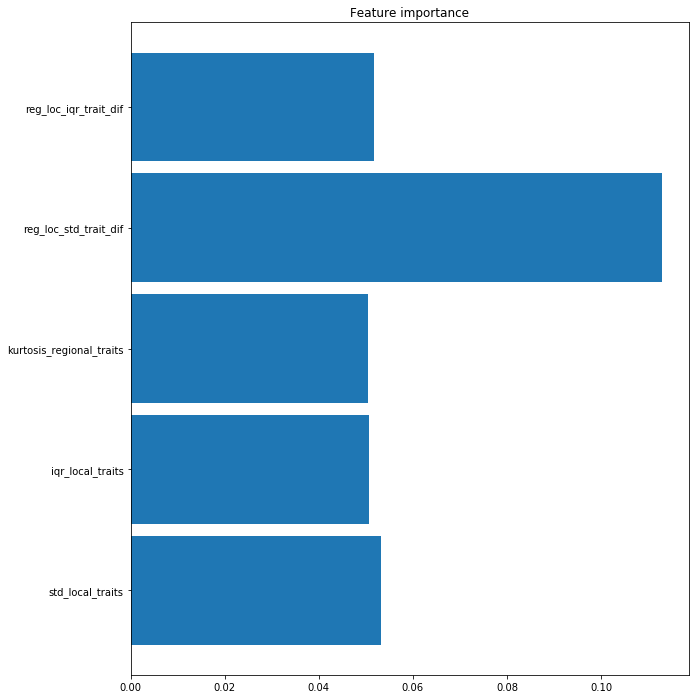

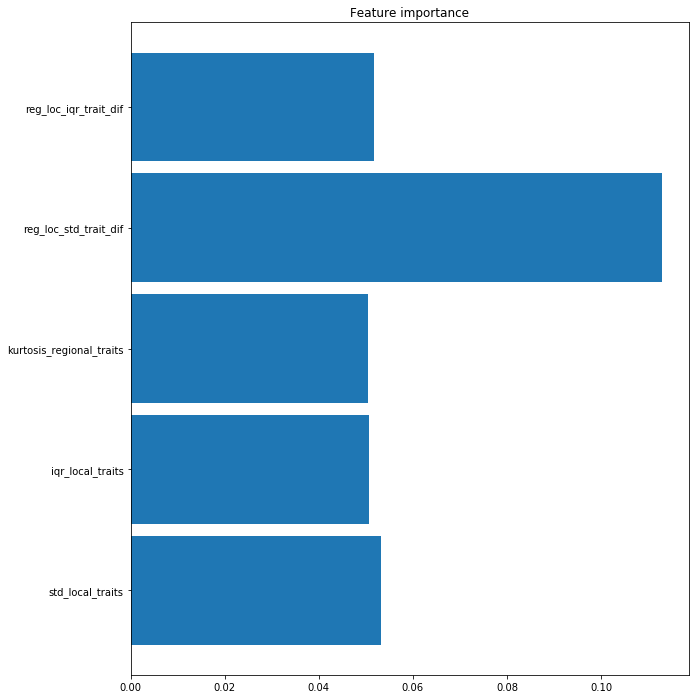

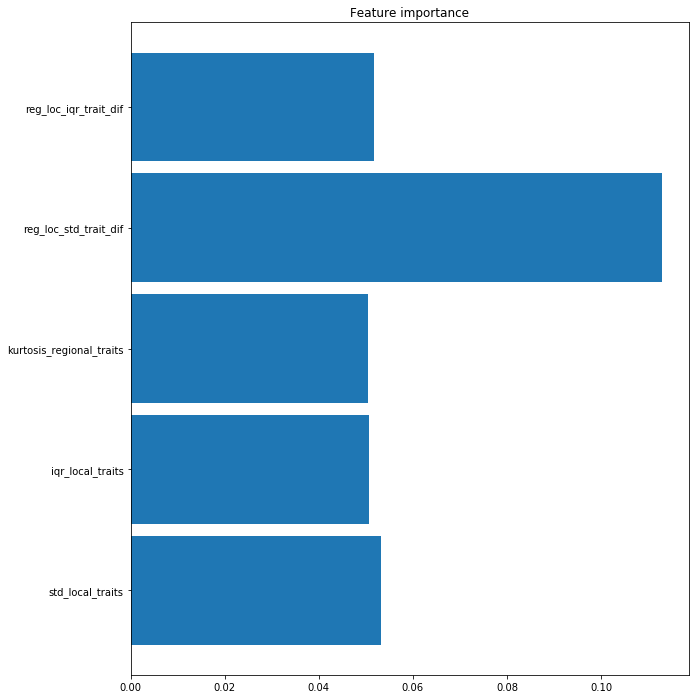

In [50]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"

cla = MESS.inference.Classifier(empirical_df=df, simfile=simfile, algorithm="rf",\
                                metacommunity_traits=metacommunity_traits, verbose=False)
for isl, df in site_df.items():
    if not os.path.exists(isl): os.mkdir(isl)
    cla.set_data(df)
    est, proba = cla.predict(select_features=True, param_search=True, quick=False, verbose=True)
    cla.dump(outfile="{}/{}_classifier.mdl".format(isl, isl))
    display(isl, est, proba)
    display(cla.feature_importances())
    cla.plot_feature_importance()

In [ ]:
cla.feature_importances()

# Estimate parameters
Set the target model to 'filtering' for the tree data.

In [64]:
rgr = MESS.inference.Regressor(empirical_df=df, simfile=simfile, target_model="filtering",\
                                algorithm="rf", metacommunity_traits=metacommunity_traits)
for isl, df in site_df.items():
    rgr.set_data(df)
    est = rgr.predict(select_features=False, param_search=True, quick=False, verbose=True)
    rgr.dump(outfile="{}/{}_regressor.mdl".format(isl, isl))
    display(isl, est, rgr.feature_importances())

Predict() started: 2019-06-14 17:32:06.567479
Finding best model parameters.
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 41.2min finished


{'n_estimators': 1600, 'min_samples_split': 10, 'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4}
Predict() finished: 2019-06-14 18:16:11.671515


'Nightcap'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,3061.783017,0.158225,5554.131455,0.004454,47.502342,0.002397,0.436492


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
Feature importance,0.032274,0.184596,0.037725,0.011778,0.009259,0.095482,0.013532,0.009653,0.008638,0.127994,0.024352,0.0,0.007086,0.011926,0.010489,0.012602,0.007968,0.026427,0.007534,0.010603,0.013834,0.014537,0.007495,0.01552,0.011676,0.024659,0.013886,0.020295,0.016548,0.025845,0.014747,0.138229,0.006328,0.006424,0.004553,0.003954,0.003621,0.002663,0.002055,0.001422,0.001793


Predict() started: 2019-06-14 18:16:14.068893


'Dorrigo'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,2150.637027,0.160143,6258.359904,0.004213,42.374553,0.002347,0.465527


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
Feature importance,0.032274,0.184596,0.037725,0.011778,0.009259,0.095482,0.013532,0.009653,0.008638,0.127994,0.024352,0.0,0.007086,0.011926,0.010489,0.012602,0.007968,0.026427,0.007534,0.010603,0.013834,0.014537,0.007495,0.01552,0.011676,0.024659,0.013886,0.020295,0.016548,0.025845,0.014747,0.138229,0.006328,0.006424,0.004553,0.003954,0.003621,0.002663,0.002055,0.001422,0.001793


Predict() started: 2019-06-14 18:16:16.390799


'Washpool'

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,2218.963059,0.165578,5760.285057,0.00429,44.872724,0.002398,0.448731


,S,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,trees,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
Feature importance,0.032274,0.184596,0.037725,0.011778,0.009259,0.095482,0.013532,0.009653,0.008638,0.127994,0.024352,0.0,0.007086,0.011926,0.010489,0.012602,0.007968,0.026427,0.007534,0.010603,0.013834,0.014537,0.007495,0.01552,0.011676,0.024659,0.013886,0.020295,0.016548,0.025845,0.014747,0.138229,0.006328,0.006424,0.004553,0.003954,0.003621,0.002663,0.002055,0.001422,0.001793


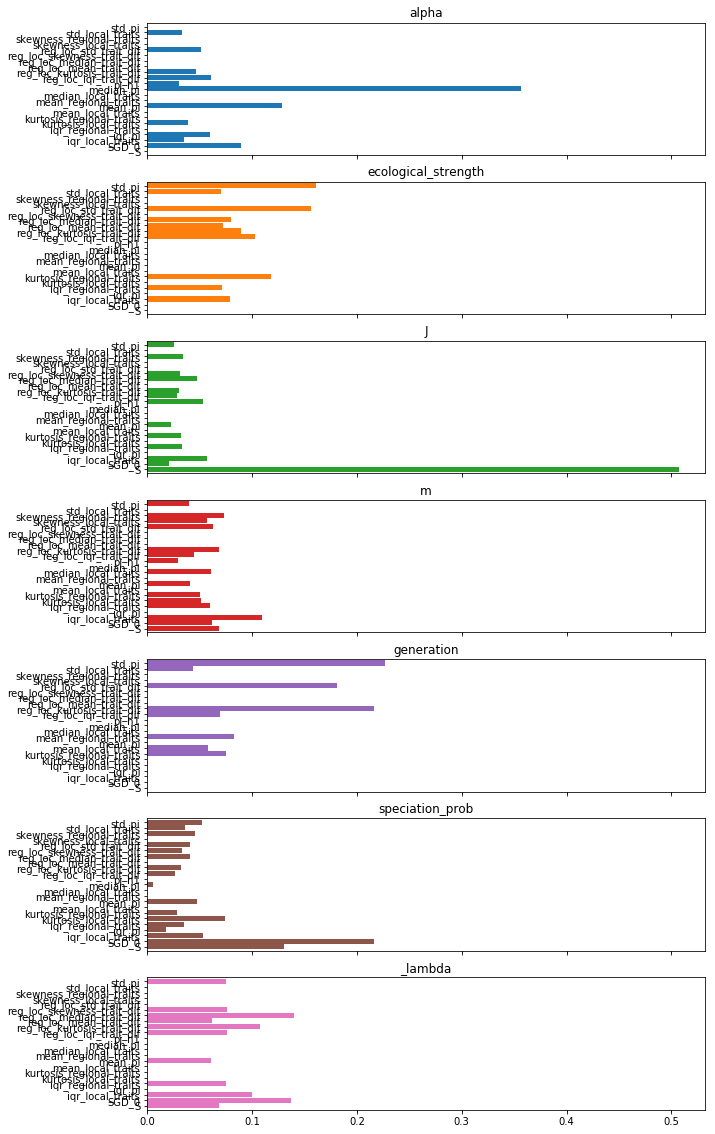

In [62]:
_ = rgr.plot_feature_importance(figsize=(10, 20))

## Posterior predictive simulations
Here we're reloading the regressor from the file so if the notebook dies we can still run the PPC without having to retrain the model.

Nightcap
New simulations will be appended to SIMOUT.txt in './ppc'. Use `force=True` to overwrite.
  [####################] 100% Performing simulations 
Calculating PCs and plotting
Dorrigo
New simulations will be appended to SIMOUT.txt in './ppc'. Use `force=True` to overwrite.
  [####################] 100% Performing simulations 
Calculating PCs and plotting
Washpool
New simulations will be appended to SIMOUT.txt in './ppc'. Use `force=True` to overwrite.
  [####################] 100% Performing simulations 
Calculating PCs and plotting


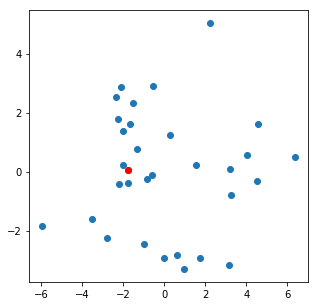

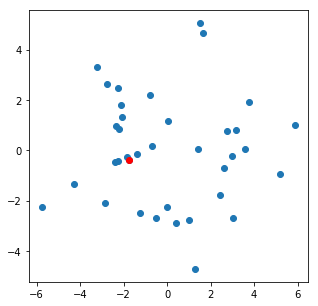

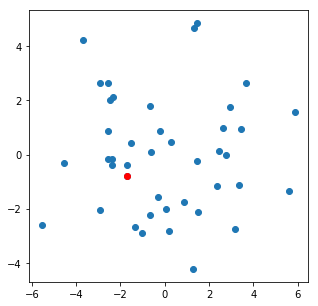

In [59]:
for isl, df in site_df.items():
    print(isl)
    rgr = MESS.inference.Ensemble.load("{}/{}_regressor.mdl".format(isl, isl))
    est = rgr.empirical_pred
    MESS.inference.posterior_predictive_check(empirical_df=df, nsims=5, parameter_estimates=est, verbose=True)

# Trash below here

In [58]:
len(cla._X)

16456